based off code from Haoran

- need to adapt since GTEx is not strand specific

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

adar_types = ['TC', 'AG']

#sample_id='GTEX-1NV5F-3226-SM-EXUSL'
sample_id='GTEX-1C4CL-2126-SM-7IGQC'

In [15]:
all_res_ss0 = pd.read_table(f"/home/klawren/oak/gtex/output/test_bams/output_kate/sprint/{sample_id}/ss_0/SPRINT_identified_all.res")
regular_res_ss0  = pd.read_table(f"/home/klawren/oak/gtex/output/test_bams/output_kate/sprint/{sample_id}/ss_0/SPRINT_identified_regular.res")
hyper_res_ss0  = pd.read_table(f"/home/klawren/oak/gtex/output/test_bams/output_kate/sprint/{sample_id}/ss_0/SPRINT_identified_hyper.res")

all_res_ss1 = pd.read_table(f"/home/klawren/oak/gtex/output/test_bams/output_kate/sprint/{sample_id}/ss_1/SPRINT_identified_all.res")
regular_res_ss1  = pd.read_table(f"/home/klawren/oak/gtex/output/test_bams/output_kate/sprint/{sample_id}/ss_1/SPRINT_identified_regular.res")
hyper_res_ss1  = pd.read_table(f"/home/klawren/oak/gtex/output/test_bams/output_kate/sprint/{sample_id}/ss_1/SPRINT_identified_hyper.res")

all_res_ss2 = pd.read_table(f"/home/klawren/oak/gtex/output/test_bams/output_kate/sprint/{sample_id}/ss_2/SPRINT_identified_all.res")
regular_res_ss2  = pd.read_table(f"/home/klawren/oak/gtex/output/test_bams/output_kate/sprint/{sample_id}/ss_2/SPRINT_identified_regular.res")
hyper_res_ss2  = pd.read_table(f"/home/klawren/oak/gtex/output/test_bams/output_kate/sprint/{sample_id}/ss_2/SPRINT_identified_hyper.res")

all_res_old = pd.read_table(f"/home/klawren/oak/gtex/output/test_bams/output_kate/sprint_unalign_split/{sample_id}/unaligned/SPRINT_identified_all.res")

are hyper the same?

Text(0.5, 1.0, 'Hyper RES ss=0 (pre-filtering): 98.2% AG/TC')

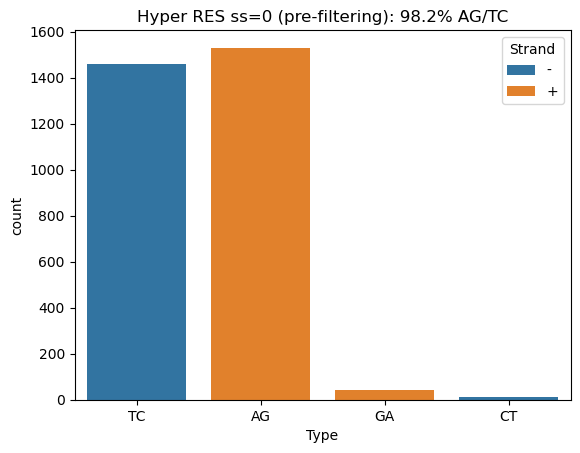

In [16]:
ax = sns.countplot(hyper_res_ss0, x='Type', hue='Strand')
ax.set_title('Hyper RES ss=0 (pre-filtering): {:.1f}% AG/TC'.format(hyper_res_ss0['Type'].isin(adar_types).mean()*100))

Text(0.5, 1.0, 'Hyper RES ss=1 (pre-filtering): 98.4% AG/TC')

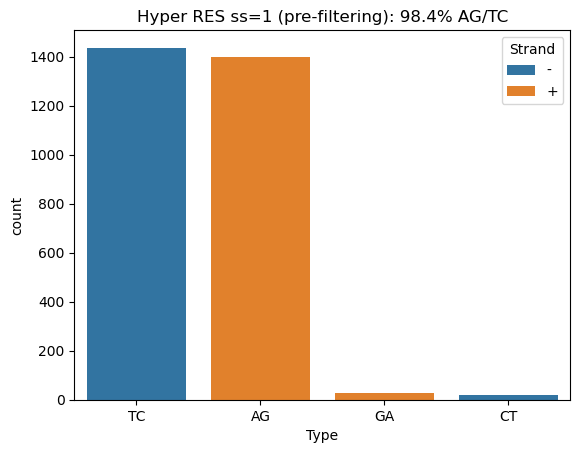

In [17]:
ax = sns.countplot(hyper_res_ss1, x='Type', hue='Strand')
ax.set_title('Hyper RES ss=1 (pre-filtering): {:.1f}% AG/TC'.format(hyper_res_ss1['Type'].isin(adar_types).mean()*100))

Text(0.5, 1.0, 'Hyper RES ss=1 (pre-filtering): 98.4% AG/TC')

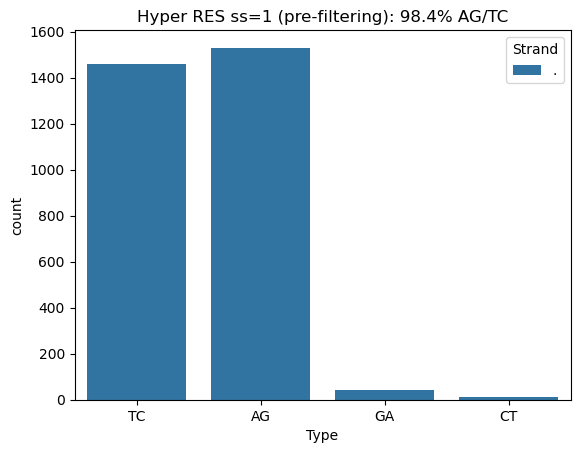

In [18]:
ax = sns.countplot(hyper_res_ss2, x='Type', hue='Strand')
ax.set_title('Hyper RES ss=1 (pre-filtering): {:.1f}% AG/TC'.format(hyper_res_ss1['Type'].isin(adar_types).mean()*100))

In [19]:
# sometimes the same site is put on both strands, so drop duplicates and only consider the AD:DP which is the same for both 
hyper_res_ss0['AD'] = hyper_res_ss0['AD:DP'].str.split(':').str[0].astype(int)
hyper_res_ss0['DP'] = hyper_res_ss0['AD:DP'].str.split(':').str[1].astype(int)
hyper_res_ss0_dedup = hyper_res_ss0[~(hyper_res_ss0[['#Chrom', 'Start(0base)', 'End(1base)', 'Type', 'AD:DP']].duplicated())]


hyper_res_ss1['AD'] = hyper_res_ss1['AD:DP'].str.split(':').str[0].astype(int)
hyper_res_ss1['DP'] = hyper_res_ss1['AD:DP'].str.split(':').str[1].astype(int)
hyper_res_ss1_dedup = hyper_res_ss1[~(hyper_res_ss1[['#Chrom', 'Start(0base)', 'End(1base)', 'Type', 'AD:DP']].duplicated())]


hyper_res_ss2['AD'] = hyper_res_ss2['AD:DP'].str.split(':').str[0].astype(int)
hyper_res_ss2['DP'] = hyper_res_ss2['AD:DP'].str.split(':').str[1].astype(int)
hyper_res_ss2_dedup = hyper_res_ss2[~(hyper_res_ss2[['#Chrom', 'Start(0base)', 'End(1base)', 'Type', 'AD:DP']].duplicated())]


print(len(hyper_res_ss0_dedup))
print(len(hyper_res_ss1_dedup))
print(len(hyper_res_ss2_dedup))

3043
2880
3043


In [ ]:
merged_hyper = pd.merge(hyper_res_ss0_dedup, hyper_res_ss1_dedup, on=['#Chrom', 'Start(0base)', 'End(1base)', 'Type'], suffixes=['_ss0', '_ss1'], how='outer')
print('{}/{} sites not in both ss0/ss1'.format(len(merged_hyper[(merged_hyper['AD:DP_ss1'].isna()) | (merged_hyper['AD:DP_ss0'].isna())]), len(merged_hyper)))
print('{}/{} sites matching AD:DP'.format(len(merged_hyper[merged_hyper['AD:DP_ss0'] == merged_hyper['AD:DP_ss1']]), len(merged_hyper[~(merged_hyper['AD:DP_ss1'].isna()) & ~(merged_hyper['AD:DP_ss0'].isna())])))

5731/5827 sites not in both
61/96 sites matching AD:DP


In [ ]:
merged_hyper = pd.merge(hyper_res_ss0_dedup, hyper_res_ss2_dedup, on=['#Chrom', 'Start(0base)', 'End(1base)', 'Type'], suffixes=['_ss0', '_ss1'], how='outer')
print('{}/{} sites not in both ss0/ss2'.format(len(merged_hyper[(merged_hyper['AD:DP_ss1'].isna()) | (merged_hyper['AD:DP_ss0'].isna())]), len(merged_hyper)))
print('{}/{} sites matching AD:DP'.format(len(merged_hyper[merged_hyper['AD:DP_ss0'] == merged_hyper['AD:DP_ss1']]), len(merged_hyper[~(merged_hyper['AD:DP_ss1'].isna()) & ~(merged_hyper['AD:DP_ss0'].isna())])))

0/3043 sites not in both
3043/3043 sites matching AD:DP


In [ ]:
merged_hyper = pd.merge(hyper_res_ss1_dedup, hyper_res_ss2_dedup, on=['#Chrom', 'Start(0base)', 'End(1base)', 'Type'], suffixes=['_ss0', '_ss1'], how='outer')
print('{}/{} sites not in both ss1/ss2'.format(len(merged_hyper[(merged_hyper['AD:DP_ss1'].isna()) | (merged_hyper['AD:DP_ss0'].isna())]), len(merged_hyper)))
print('{}/{} sites matching AD:DP'.format(len(merged_hyper[merged_hyper['AD:DP_ss0'] == merged_hyper['AD:DP_ss1']]), len(merged_hyper[~(merged_hyper['AD:DP_ss1'].isna()) & ~(merged_hyper['AD:DP_ss0'].isna())])))

5731/5827 sites not in both
61/96 sites matching AD:DP


In [11]:
merged_hyper[merged_hyper['#Chrom'] == 'chr21']

,#Chrom,Start(0base),End(1base),Type,Supporting_reads_ss0,Strand_ss0,AD:DP_ss0,AD_ss0,DP_ss0,Supporting_reads_ss1,Strand_ss1,AD:DP_ss1,AD_ss1,DP_ss1
3156,chr21,9308047,9308048,TC,NaN,NaN,NaN,NaN,NaN,1.0,-,1:1,1.0,1.0
3157,chr21,9308048,9308049,TC,NaN,NaN,NaN,NaN,NaN,1.0,-,1:1,1.0,1.0
3158,chr21,9308053,9308054,TC,NaN,NaN,NaN,NaN,NaN,1.0,-,1:1,1.0,1.0
3159,chr21,9308058,9308059,TC,NaN,NaN,NaN,NaN,NaN,1.0,-,1:1,1.0,1.0
3160,chr21,9308063,9308064,TC,NaN,NaN,NaN,NaN,NaN,1.0,-,1:1,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3216,chr21,43891466,43891467,AG,NaN,NaN,NaN,NaN,NaN,1.0,+,1:1,1.0,1.0
3217,chr21,43891469,43891470,AG,NaN,NaN,NaN,NaN,NaN,1.0,+,1:1,1.0,1.0
3218,chr21,43891475,43891476,AG,NaN,NaN,NaN,NaN,NaN,1.0,+,1:1,1.0,1.0
3219,chr21,43891478,43891479,AG,NaN,NaN,NaN,NaN,NaN,1.0,+,1:1,1.0,1.0


In [12]:
merged_hyper[~(merged_hyper['AD:DP_ss1'].isna()) & ~(merged_hyper['AD:DP_ss0'].isna())]

,#Chrom,Start(0base),End(1base),Type,Supporting_reads_ss0,Strand_ss0,AD:DP_ss0,AD_ss0,DP_ss0,Supporting_reads_ss1,Strand_ss1,AD:DP_ss1,AD_ss1,DP_ss1
343,chr1,233279273,233279274,AG,1.0,+,1:1,1.0,1.0,1.0,+,1:1,1.0,1.0
344,chr1,233279285,233279286,AG,1.0,+,1:1,1.0,1.0,1.0,+,1:1,1.0,1.0
345,chr1,233279287,233279288,AG,1.0,+,1:1,1.0,1.0,1.0,+,1:1,1.0,1.0
346,chr1,233279292,233279293,AG,1.0,+,1:1,1.0,1.0,1.0,+,1:1,1.0,1.0
347,chr1,233279297,233279298,AG,1.0,+,1:1,1.0,1.0,1.0,+,1:1,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5699,chrX,78926641,78926642,AG,2.0,+,2:2,2.0,2.0,1.0,+,1:1,1.0,1.0
5704,chrX,78926654,78926655,AG,2.0,+,2:2,2.0,2.0,1.0,+,1:1,1.0,1.0
5705,chrX,78926656,78926657,AG,2.0,+,2:2,2.0,2.0,1.0,+,1:1,1.0,1.0
5711,chrX,78926680,78926681,AG,2.0,+,2:2,2.0,2.0,1.0,+,1:1,1.0,1.0


Text(0.5, 1.0, 'Hyper RES with ss=1 vs ss=0')

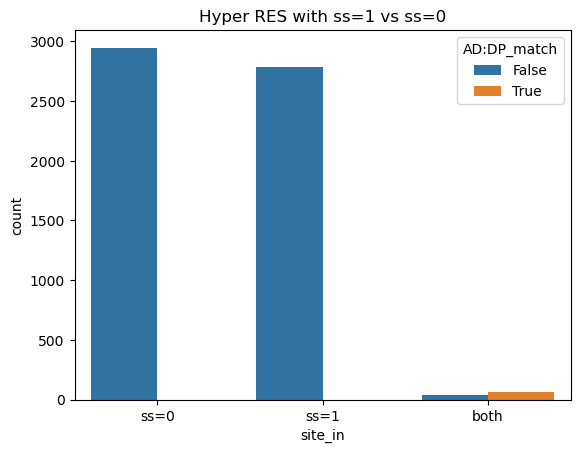

In [13]:
merged_hyper['site_in'] = np.where(~(merged_hyper['AD:DP_ss0'].isna()), 
    np.where(~(merged_hyper['AD:DP_ss1'].isna()), 'both', 'ss=0'), 'ss=1')

merged_hyper['AD:DP_match'] = merged_hyper['AD:DP_ss0'] == merged_hyper['AD:DP_ss1']

ax = sns.countplot(merged_hyper, x='site_in', hue='AD:DP_match')
ax.set_title('Hyper RES with ss=1 vs ss=0')

In [ ]:
# does the ss2 capture both?



are regular the same?

Text(0.5, 1.0, 'Regular RES ss=0 (pre-filtering): 98.6% AG/TC')

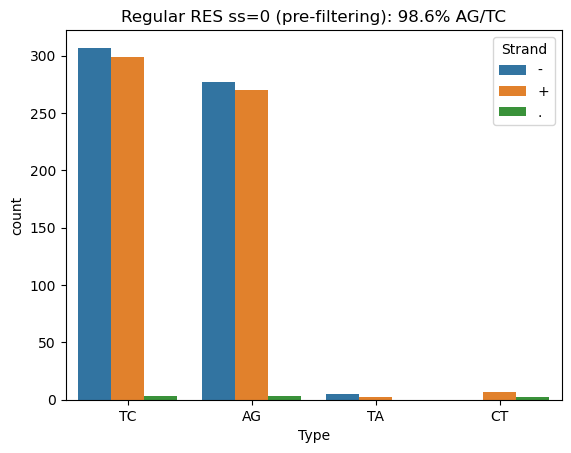

In [5]:
ax = sns.countplot(regular_res_ss0, x='Type', hue='Strand')
ax.set_title('Regular RES ss=0 (pre-filtering): {:.1f}% AG/TC'.format(regular_res_ss0['Type'].isin(adar_types).mean()*100))

Text(0.5, 1.0, 'Regular RES ss=0 (pre-filtering): 99.5% AG/TC')

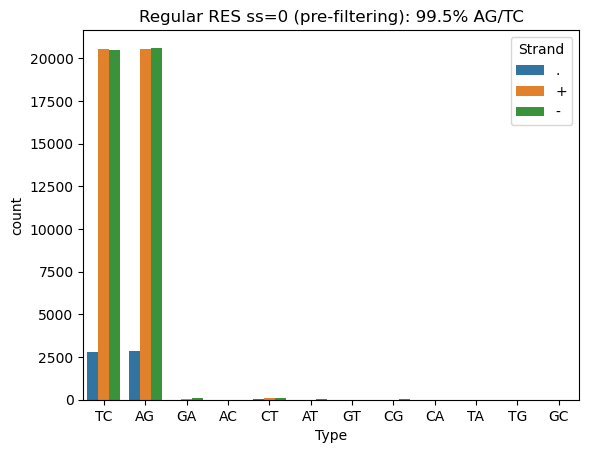

In [31]:
ax = sns.countplot(regular_res_ss0, x='Type', hue='Strand')
ax.set_title('Regular RES ss=0 (pre-filtering): {:.1f}% AG/TC'.format(regular_res_ss0['Type'].isin(adar_types).mean()*100))

Text(0.5, 1.0, 'Regular RES ss=1 (pre-filtering): 99.5% AG/TC')

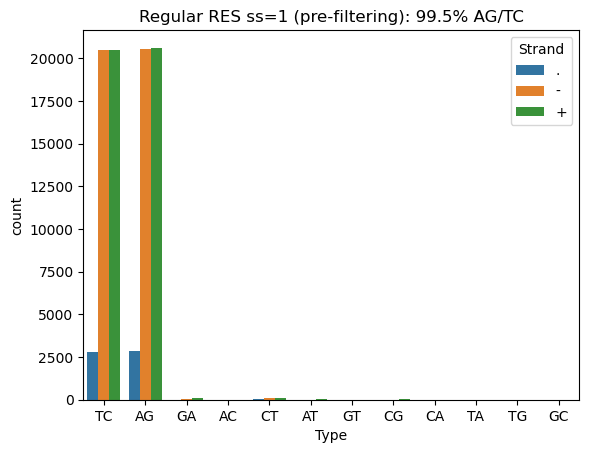

In [32]:
ax = sns.countplot(regular_res_ss1, x='Type', hue='Strand')
ax.set_title('Regular RES ss=1 (pre-filtering): {:.1f}% AG/TC'.format(regular_res_ss1['Type'].isin(adar_types).mean()*100))

In [33]:
# sometimes the same site is put on both strands, so drop duplicates and only consider the AD:DP which is the same for both 
regular_res_ss0 = regular_res_ss0[['#Chrom', 'Start(0base)', 'End(1base)', 'Type', 'AD:DP']].drop_duplicates()
regular_res_ss0['AD'] = regular_res_ss0['AD:DP'].str.split(':').str[0].astype(int)
regular_res_ss0['DP'] = regular_res_ss0['AD:DP'].str.split(':').str[1].astype(int)

regular_res_ss1 = regular_res_ss1[['#Chrom', 'Start(0base)', 'End(1base)', 'Type', 'AD:DP']].drop_duplicates()
regular_res_ss1['AD'] = regular_res_ss1['AD:DP'].str.split(':').str[0].astype(int)
regular_res_ss1['DP'] = regular_res_ss1['AD:DP'].str.split(':').str[1].astype(int)

print(len(regular_res_ss0))
print(len(regular_res_ss1))

88196
88196


In [34]:
# are regular the same?
merged_regular = pd.merge(regular_res_ss0, regular_res_ss1, on=['#Chrom', 'Start(0base)', 'End(1base)', 'Type'], suffixes=['_ss0', '_ss1'], how='outer')
print('{}/{} sites not in both'.format(len(merged_regular[(merged_regular['AD:DP_ss1'].isna()) | (merged_regular['AD:DP_ss0'].isna())]), len(merged_regular)))
print('{}/{} sites not matching AD:DP'.format(len(merged_regular[merged_regular['AD:DP_ss0'] != merged_regular['AD:DP_ss1']]), len(merged_regular)))

0/88196 sites not in both
13198/88196 sites not matching AD:DP


Text(0.5, 1.0, 'Regular RES with ss=1 vs ss=0')

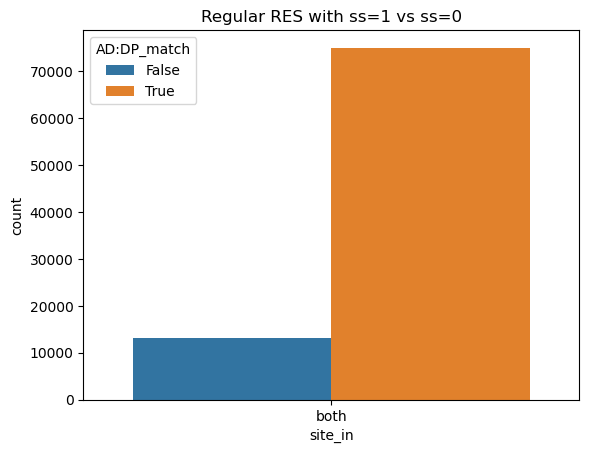

In [35]:
merged_regular['site_in'] = np.where(~(merged_regular['AD:DP_ss0'].isna()), 
    np.where(~(merged_regular['AD:DP_ss1'].isna()), 'both', 'ss=0'), 'ss=1')

merged_regular['AD:DP_match'] = merged_regular['AD:DP_ss0'] == merged_regular['AD:DP_ss1']

ax = sns.countplot(merged_regular, x='site_in', hue='AD:DP_match')
ax.set_title('Regular RES with ss=1 vs ss=0')

regular picks up on the same sites, but not with the same AD:DP

<Axes: xlabel='AD_ss1', ylabel='AD_ss0'>

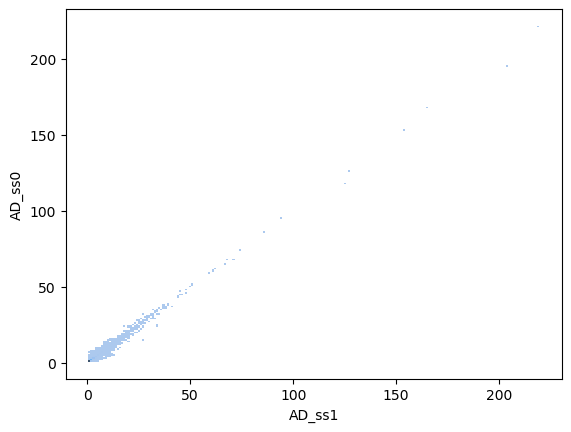

In [36]:
sns.histplot(merged_regular, x='AD_ss1', y='AD_ss0', discrete=True)

8492/88196 not matching AD


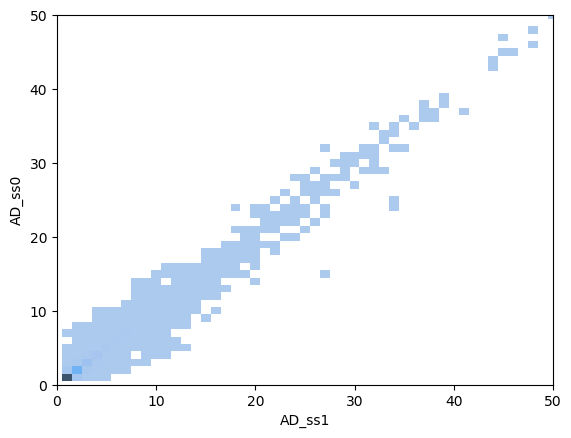

In [37]:
ax = sns.histplot(merged_regular, x='AD_ss1', y='AD_ss0', discrete=True)
ax.set_xlim([0,50])
ax.set_ylim([0,50])
print('{}/{} not matching AD'.format(len(merged_regular[merged_regular['AD_ss0'] != merged_regular['AD_ss1']]), len(merged_regular)))

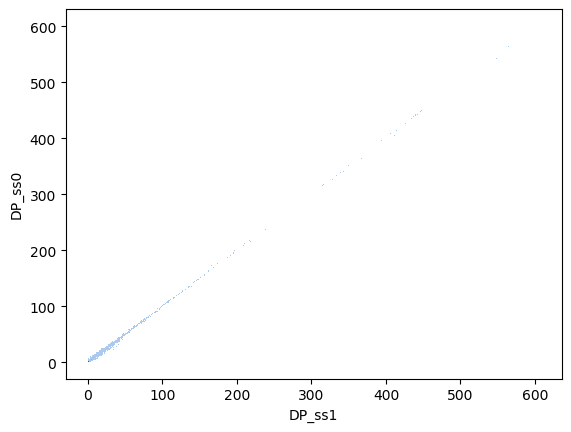

In [38]:
ax = sns.histplot(merged_regular, x='DP_ss1', y='DP_ss0', discrete=True)

12787/88196 not matching DP


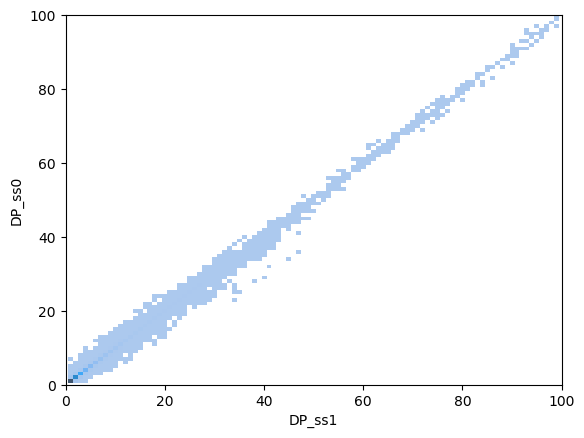

In [39]:
ax = sns.histplot(merged_regular, x='DP_ss1', y='DP_ss0', discrete=True)
ax.set_xlim([0,100])
ax.set_ylim([0,100])
print('{}/{} not matching DP'.format(len(merged_regular[merged_regular['DP_ss0'] != merged_regular['DP_ss1']]), len(merged_regular)))

In [42]:
hyper_res_ss0.columns

Index(['#Chrom', 'Start(0base)', 'End(1base)', 'Type', 'Supporting_reads',
       'Strand', 'AD:DP', 'AD', 'DP'],
      dtype='object')

In [46]:
hyper_intermediate_ss0 = pd.read_table(f"/home/klawren/oak/gtex/output/test_bams/output_kate/sprint_ss0/{sample_id}/tmp/hyper.res", header=None, names=['#Chrom', 'Start(0base)', 'End(1base)', 'Type', 'Supporting_reads', 'Strand'])
hyper_intermediate_ss1 = pd.read_table(f"/home/klawren/oak/gtex/output/test_bams/output_kate/sprint_ss1/{sample_id}/tmp/hyper.res", header=None, names=['#Chrom', 'Start(0base)', 'End(1base)', 'Type', 'Supporting_reads', 'Strand'])

In [53]:
hyper_intermediate_ss0 = hyper_intermediate_ss0.groupby(['#Chrom', 'Start(0base)', 'End(1base)', 'Type']).agg({'Supporting_reads':sum}).reset_index()
hyper_intermediate_ss1 = hyper_intermediate_ss1.groupby(['#Chrom', 'Start(0base)', 'End(1base)', 'Type']).agg({'Supporting_reads':sum}).reset_index()

/local/scratch/klawren/slrmtmp.48544614/ipykernel_48147/560419394.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  hyper_intermediate_ss0 = hyper_intermediate_ss0.groupby(['#Chrom', 'Start(0base)', 'End(1base)', 'Type']).agg({'Supporting_reads':sum}).reset_index()
/local/scratch/klawren/slrmtmp.48544614/ipykernel_48147/560419394.py:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  hyper_intermediate_ss1 = hyper_intermediate_ss1.groupby(['#Chrom', 'Start(0base)', 'End(1base)', 'Type']).agg({'Supporting_reads':sum}).reset_index()


In [55]:
merged_hyper_intermediate = pd.merge(hyper_intermediate_ss0, hyper_intermediate_ss1, on=['#Chrom', 'Start(0base)', 'End(1base)', 'Type'], suffixes=['_ss0', '_ss1'], how='outer')
print('{}/{} sites not in both'.format(len(merged_hyper[(merged_hyper['Supporting_reads_ss1'].isna()) | (merged_hyper['Supporting_reads_ss0'].isna())]), len(merged_hyper)))
print('{}/{} sites matching Supporting_reads'.format(len(merged_hyper[merged_hyper['Supporting_reads_ss0'] == merged_hyper['Supporting_reads_ss1']]), len(merged_hyper[~(merged_hyper['Supporting_reads_ss1'].isna()) & ~(merged_hyper['Supporting_reads_ss0'].isna())])))

69312/72967 sites not in both
2368/3655 sites matching Supporting_reads


hyper_intermediate_ss0

In [ ]:
###### After you finished FASTP+SPRINT, you can use this script to merge all SPRINT results into one file ######
# cd /project/qinl1lab/haoran/data/Cell_immunity_2021_Za_Z_RNA/sprint_mp
# gtfpath="/project/qinl1lab/haoran/data/repository/mouse/GRCm38_gencode_release19/annotation/genes.gtf"
# editome="/project/qinl1lab/haoran/software/AtoI_pipeline/editome/TABLE1_mm10_only_REDIportal.bed"
# snppath="/project/qinl1lab/haoran/software/AtoI_pipeline/editome/snp142_mm10_single_exact_AG.tsv.gz"
# bsub -e sprint_sum.e -o sprint_sum.o -J sprint_sum "source ~/.bashrc; conda activate py311mpile; python sprint_sum.py -gtf ${gtfpath} -edi ${editome} -snp ${snppath}"

# bsub -Is bash
# conda activate py311mpile
# python sprint_sum.py -gtf ${gtfpath} -edi ${editome} -snp ${snppath}

import os
import glob
import argparse
import pybedtools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2
from sklearn.cluster import DBSCAN

parser = argparse.ArgumentParser(description="Parameters for merging files after SPRINT")
parser.add_argument('-gtf', type=str, default='genes.gtf', help="GTF annotation")
parser.add_argument('-edi', type=str, default='editome.bed', help="Reference editome")  # 1-based start
parser.add_argument('-snp', type=str, default='known_snp.tsv.gz', help="Known SNP to exclude")  # 0-based start
args = parser.parse_args()

###### Merge all the SPRINT-identified RES into one dataframe ######
metadata = pd.read_table('../metadata.tsv', sep='\t')
filelist = sorted(glob.glob('*/SPRINT_identified_all.res'))  # All 15 samples
# filelist = [f'{i}/SPRINT_identified_all.res' for i in metadata['name'].iloc[:9]]  # 9 Brain samples
# filelist = [f'{i}/SPRINT_identified_all.res' for i in metadata['name'].iloc[9:]]  # 6 Raw samples

df_summary = []
for file in filelist:
    sampid = file.split('/')[0]
    df_all = pd.read_table(file)
    df_hyper = pd.read_table(file[:-8] + '_hyper.res')
    df_regular = pd.read_table(file[:-8] + '_regular.res')
    df_hyper['sample_id'] = sampid
    df_regular['sample_id'] = sampid
    df_hyper['editing_type'] = 1
    df_regular['editing_type'] = 2
    df_agg = pd.concat([df_hyper, df_regular], axis=0)
    df_agg = df_agg.groupby(by=['#Chrom', 'Start(0base)', 'End(1base)', 'Type', 'Strand', 'AD:DP', 'sample_id']).sum()
    df_agg = df_agg.reset_index()
    df_agg = df_agg.reindex(columns=list(df_all.columns) + ['sample_id', 'editing_type'])
    print(sampid, df_agg.shape[0] == df_all.shape[0])
    print(file)
    print(file[:-8] + '_hyper.res')
    print(file[:-8] + '_regular.res')
    df_summary.append(df_agg)
    print('============')
df_summary = pd.concat(df_summary, axis=0)
df_summary['editing_type'] = df_summary['editing_type'] .map({0: 'unknown', 1: 'hyper', 2: 'regular', 3: 'both'})
df_summary.to_csv('sprint_summary.tsv.gz', sep='\t', index=False, compression='gzip')

###### Updata the reference editome with novel SPRINT-identified RES ######
df_novo = pd.read_table('sprint_summary.tsv.gz', sep='\t')
df_novo = df_novo[df_novo['#Chrom'].str.startswith('chr') & (df_novo['#Chrom'].str.find('_') < 0)]
df_novo = df_novo.query('(Type=="AG" & Strand=="+") | (Type=="TC" & Strand=="-")')
df_novo[['editedreads', 'coverage']] = df_novo['AD:DP'].str.split(':', expand=True).astype(int)
df_novo = df_novo.query('coverage>=20 & editedreads>=2')  # Set the threshold (minimum coverage and editedreads need for an RES)
sample_ct = df_novo.groupby(['#Chrom', 'Start(0base)', 'End(1base)', 'Type', 'Strand'])['sample_id'].count()
df_novo = df_novo.set_index(['#Chrom', 'Start(0base)', 'End(1base)', 'Type', 'Strand'])
df_novo['sample_ct'] = sample_ct
df_novo = df_novo.reset_index()
df_novo = df_novo.query('sample_ct>=3')  # Set the threshold (the RES needs to appear in more than 1 samples)

df_gtf = pd.read_table(args.gtf, sep='\t', header=None, comment='#')
df_gtf = df_gtf[df_gtf[2] == "gene"]
df_gtf = df_gtf[df_gtf[0].str.startswith("chr") & (df_gtf[0].str.find('_') < 0)]  # Drop non-classic contigs
df_gtf = df_gtf.reset_index(drop=True)
df_gtf[9] = df_gtf[8].apply(lambda x: [i.split('"')[1] for i in x.split(';') if 'gene_name' in i][0])

bed_gtf = pybedtools.BedTool().from_dataframe(df_gtf[[0, 3, 4, 9, 5, 6]])
bed_novo = pybedtools.BedTool().from_dataframe(df_novo.iloc[:, [0, 1, 2, 3, 11, 4]])
bed_anno = bed_novo.intersect(bed_gtf, loj=True, s=True)  # Annotate the GTF information

df_anno = bed_anno.to_dataframe()
if df_anno.shape[0] > 0:
    df_anno['score'] = 0
    df_anno['name'] = df_anno['blockCount']
    df_anno = df_anno.iloc[:, 0:6].drop_duplicates()
    df_anno['name'] = df_anno.apply(lambda x: ("_".join([x['chrom'], str(x['end'])])) if x['name']=="." else x['name'], axis=1)
df_anno['start'] = df_anno['end'] - 1  # Use 0-based start for bedtools intersection to avoid intersecting zero-length regions
df_anno = df_anno.sort_values(by=['chrom', 'start', 'end']).reset_index(drop=True)
df_anno.to_csv('editome_new_with_snp.tsv.gz', sep='\t', index=False, compression='gzip')

df_known = pd.read_table(args.edi, sep='\t', header=None, names=['chrom', 'start', 'end', 'name', 'score', 'strand'])
df_known['start'] = df_known['end'] - 1  # Use 0-based start for bedtools intersection to avoid intersecting zero-length regions
df_known = df_known.sort_values(by=['chrom', 'start', 'end']).reset_index(drop=True)
df_known.to_csv('editome_ref_with_snp.tsv.gz', sep='\t', index=False, compression='gzip')

##### Exclude known SNPs if you provide a preprocessed dbSNP file (0-based, bed6 format, exact_AG.tsv.gz) ######
known_snps = pybedtools.BedTool(args.snp)  # Make sure externally it has 0-based start (exact_AG.tsv.gz, not exact_AG.bed)
df_anno_bed = pybedtools.BedTool().from_dataframe(df_anno)
df_known_bed = pybedtools.BedTool().from_dataframe(df_known)
df_anno_bed_no_snp = df_anno_bed.intersect(known_snps, v=True, sorted=True)
df_known_bed_no_snp = df_known_bed.intersect(known_snps, v=True, sorted=True)
df_anno = df_anno_bed_no_snp.to_dataframe()
df_known = df_known_bed_no_snp.to_dataframe()
df_anno.to_csv('editome_new_without_snp.tsv.gz', sep='\t', index=False, compression='gzip')
df_known.to_csv('editome_ref_without_snp.tsv.gz', sep='\t', index=False, compression='gzip')

df_merge = pd.concat([df_known, df_anno], axis=0).drop_duplicates(subset=['chrom', 'end', 'strand'])
df_merge['start'] = df_merge['end']  # Just to follow the mpileup custom (1 based and fully-close)
df_merge.sort_values(by=['chrom', 'start', 'strand'], inplace=True)
df_merge.to_csv('updated_editome.bed', sep='\t', index=False, header=None)
print('Successfully updated the editome!')

###### Draw a venn diagram for the updated editome ######
set1 = set(df_known.set_index(['chrom', 'end', 'strand']).index)
set2 = set(df_anno.set_index(['chrom', 'end', 'strand']).index)
plt.figure(figsize=(8, 5))
venn2([set1, set2], ('Reference editome\n(from REDIportal)', 'SPRINT de novo\n(from new samples)'))
plt.title('Number of RNA editing sites after excluding SNPs', fontweight='bold')
plt.tight_layout()
plt.savefig('updated_editome.pdf', dpi=200)

###### Draw a barplot for all SPRINT-identified sites (before filter) ######
df = pd.read_table('sprint_summary.tsv.gz')
df = df.rename(columns={'#Chrom': 'chrom', 'Start(0base)': 'start', 'End(1base)': 'end'})
df[['AD', 'DP']] = df['AD:DP'].str.split(':', expand=True)
df['AD'] = df['AD'].astype(int)
df['DP'] = df['DP'].astype(int)
df['Mismatch_type'] = df['Type'] + '(' + df['Strand'] + ')'
pdata1 = df['Mismatch_type'].value_counts()
pdata1p = pdata1 / pdata1.sum()  # Fraction
pdata1top2 = pdata1p['AG(+)'] + pdata1p['TC(-)']
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
sns.barplot(pdata1, ax=ax)
ax.set_ylabel('Count of SPRINT-identified records')
ax.set_xticks(pdata1.index)
ax.set_xticklabels(pdata1.index, rotation=90)
ax.text(2, pdata1.max(), f'A-to-I sites: {pdata1top2:.2%}', ha='left', va='top')
plt.tight_layout()
plt.savefig('sprint_summary1.pdf', dpi=200)

###### Perform DBSCAN to get RNA editing clusters ######
editomebed = df_merge.copy()
editomebed['clusterid'] = -2
dbscan1205 = DBSCAN(eps=120, min_samples=5)
for chrom_temp in editomebed['chrom'].unique():
    X = editomebed[editomebed['chrom'] == chrom_temp]['end'].values.reshape(-1, 1)
    clusters = dbscan1205.fit_predict(X)  # Looping into a new chrom, the clustered RES will start from 0
    editomebed.loc[editomebed['chrom'] == chrom_temp, 'clusterid'] = clusters  # -1 for non_clustered_RES
del chrom_temp, X, clusters, dbscan1205
editomeclu = editomebed[editomebed['clusterid'] > -0.5]  # Select only cluster-forming RES for naming REC
clusteragg = editomeclu.groupby(['chrom', 'clusterid']).agg({'start': 'min', 'end': 'max'})
clusteragg['clusterstrand'] = editomeclu.groupby(['chrom', 'clusterid'])['strand'].agg(lambda x: x.value_counts().index[0])
clusteragg['clustersites'] = editomeclu.groupby(['chrom', 'clusterid'])['strand'].count()
clusteragg['clustername'] = clusteragg.apply(lambda x: '_'.join([x.name[0], str(x['start']), str(x['end'])]), axis=1)
clustermap = lambda x: 'non_clustered' if x['clusterid'] < -0.5 else clusteragg.loc[(x['chrom'], x['clusterid']), 'clustername']
editomebed['clustername'] = editomebed.apply(clustermap, axis=1)
clusteragg = clusteragg.reset_index().reindex(columns=['chrom', 'start', 'end', 'clustername', 'clusterid', 'clusterstrand', 'clustersites'])
del editomeclu, clustermap
editomebed.to_csv('updated_RES_REC.tsv.gz', sep='\t', index=False, compression='gzip')  # It takes 4 min for clustering hg38 editome
clusteragg.to_csv('updated_uniqREC.tsv.gz', sep='\t', index=False, compression='gzip')  # It takes 4 min for clustering hg38 editome
print('Successfully updated the RNA editing clusters!\n')

###### Draw a barplot for all SPRINT-identified sites (after filter) Code are a little redundant here ######
df_novo = pd.read_table('sprint_summary.tsv.gz', sep='\t')
df_novo = df_novo[df_novo['#Chrom'].str.startswith('chr') & (df_novo['#Chrom'].str.find('_') < 0)]
df_novo[['editedreads', 'coverage']] = df_novo['AD:DP'].str.split(':', expand=True).astype(int)
df_novo = df_novo.query('coverage>=20 & editedreads>=2')  # Set the threshold (minimum coverage and editedreads need for an RES)
sample_ct = df_novo.groupby(['#Chrom', 'Start(0base)', 'End(1base)', 'Type', 'Strand'])['sample_id'].count()
df_novo = df_novo.set_index(['#Chrom', 'Start(0base)', 'End(1base)', 'Type', 'Strand'])
df_novo['sample_ct'] = sample_ct
df_novo = df_novo.reset_index()
df_novo = df_novo.query('sample_ct>=3')  # Set the threshold (the RES needs to appear in more than 1 samples)
df_novo = df_novo.drop_duplicates(subset=['#Chrom', 'End(1base)', 'Type', 'Strand'])  # Combine duplicate sites
df = df_novo.copy()
df = df.rename(columns={'#Chrom': 'chrom', 'Start(0base)': 'start', 'End(1base)': 'end'})
df[['AD', 'DP']] = df['AD:DP'].str.split(':', expand=True)
df['AD'] = df['AD'].astype(int)
df['DP'] = df['DP'].astype(int)
df['Mismatch_type'] = df['Type'] + '(' + df['Strand'] + ')'
pdata1 = df['Mismatch_type'].value_counts()
pdata1p = pdata1 / pdata1.sum()  # Fraction
pdata1top2 = pdata1p['AG(+)'] + pdata1p['TC(-)']
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
sns.barplot(pdata1, ax=ax)
ax.set_ylabel('Count of SPRINT-identified sites')
ax.set_xticks(pdata1.index)
ax.set_xticklabels(pdata1.index, rotation=90)
ax.text(2, pdata1.max(), f'A-to-I sites: {pdata1top2:.2%}', ha='left', va='top')
plt.tight_layout()
plt.savefig('sprint_summary2.pdf', dpi=200)

In [ ]:
# based off